In [1]:
import pandas as pd;
import pandas as np;
import seaborn as sns;
import matplotlib.pyplot as plt;


root = r'C:\Users\Admin\Documents\GitHub\QA_reskill\week 11';

df = pd.read_csv(root + r'\Customer-Churn-Records.csv');

In [2]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.isna().sum() # nothing missing

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [4]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [5]:
#check to ee if there are any duplicate customers
df['CustomerId'].nunique() # there are 10,000 rows and 10,000 unique IDs so no duplicates

10000

In [6]:
filt = df['Surname'].str.contains(r'[^a-zA-Z\s\'\-]');#filter to check for surnames with non-letter characters- apostrophe, blank space and hyphen is ok too
df[filt]['Surname'].count() # apply filter to dataframe then select for Suranme column and get count
#there are 92 surnames with non-letter content

92

In [7]:
df[filt]['Surname'].to_frame()

,Surname
9,H?
329,L?
437,Hs?
941,Y?an
970,L?
...,...
9633,K?
9704,L?
9792,Y?
9857,K?


In [8]:
#drop  columns
df2 =df.drop(['RowNumber','Surname','Geography'], axis=1);
df2

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,516,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,709,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,772,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [9]:
#rename columns
df2.rename(columns={'Tenure':'YearsWithBank'}, inplace = True);
df2

,CustomerId,CreditScore,Gender,Age,YearsWithBank,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,516,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,709,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,772,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


# DEMOGRAPHIC ANALYSIS

## % exiting by age group

In [10]:
 
#Percentage of customers who left the bank per age group

#these are the start points of each age grouping you want
bins = [18,30,40,50,60,100];

#these are th labels for each group.Note how they sit'between' the age bins
labels = ['18-29','30-39', '40-49', '50-59', '60+'];

# use the pd.cut function to create a new column where the row's age is categorised according to age bins and given the corresponding label
df2['age_group']= pd.cut(df['Age'], bins=bins, labels=labels);

churn_rate_by_age_group = df2.groupby('age_group')['Exited'].mean().to_frame(name = '%Exited');
churn_rate_by_age_group['%Exited'] = churn_rate_by_age_group['%Exited']*100
churn_rate_by_age_group


,%Exited
age_group,
18-29,7.502569
30-39,12.109638
40-49,33.965517
50-59,56.210790
60+,24.784483


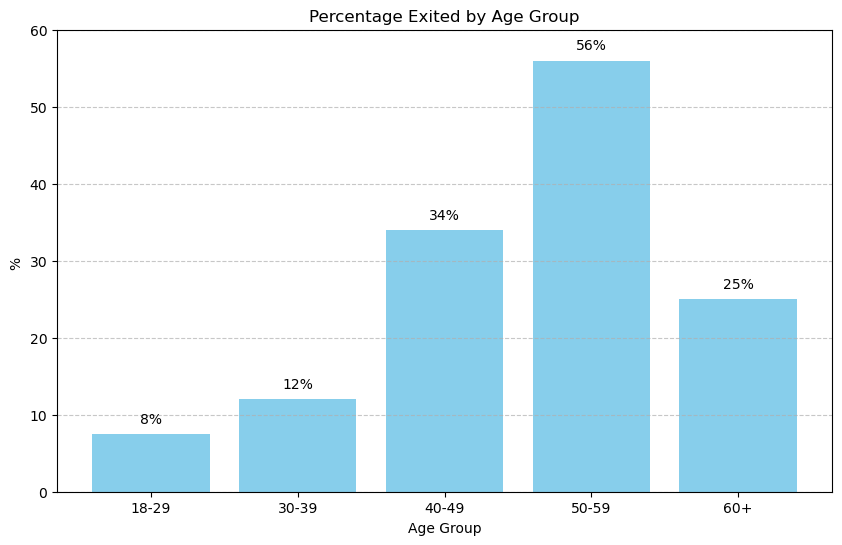

In [29]:
# Data
age_groups = ['18-29', '30-39', '40-49', '50-59', '60+']
percent_exited = [7.5, 12, 34, 56, 25]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(age_groups, percent_exited, color='skyblue')
plt.title('Percentage Exited by Age Group')
plt.xlabel('Age Group')
plt.ylabel('% ')
plt.ylim(0, 60)  # Adjust the y-axis limit if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the values on top of the bars
for i, value in enumerate(percent_exited):
    plt.text(i, value + 1, f'{value:.0f}%', ha='center', va='bottom')

plt.show()

# % exiting by age-group and gender

In [12]:
#% of customers leaving the bank by age-group and gender

bins = [18,30,40,50,60,100];
labels = ['18-29','30-39', '40-49', '50-59', '60+'];
df2['age_group']= pd.cut(df2['Age'], bins=bins, labels=labels);
#print(df2[['Age','age_group']])

In [13]:
#% of customers leaving the bank by agr group and gender
df3 =df2.groupby(['age_group', 'Gender'])['Exited'].mean().to_frame(name = '% Exited');
df3['% Exited'] = df3['% Exited']*100;
df3

% Exited
age_group Gender           
18-29     Female   9.931507
          Male     5.514019
30-39     Female  15.569168
          Male     9.390048
40-49     Female  38.909091
          Male    29.508197
50-59     Female  65.217391
          Male    47.536946
60+       Female  30.046948
          Male    20.318725

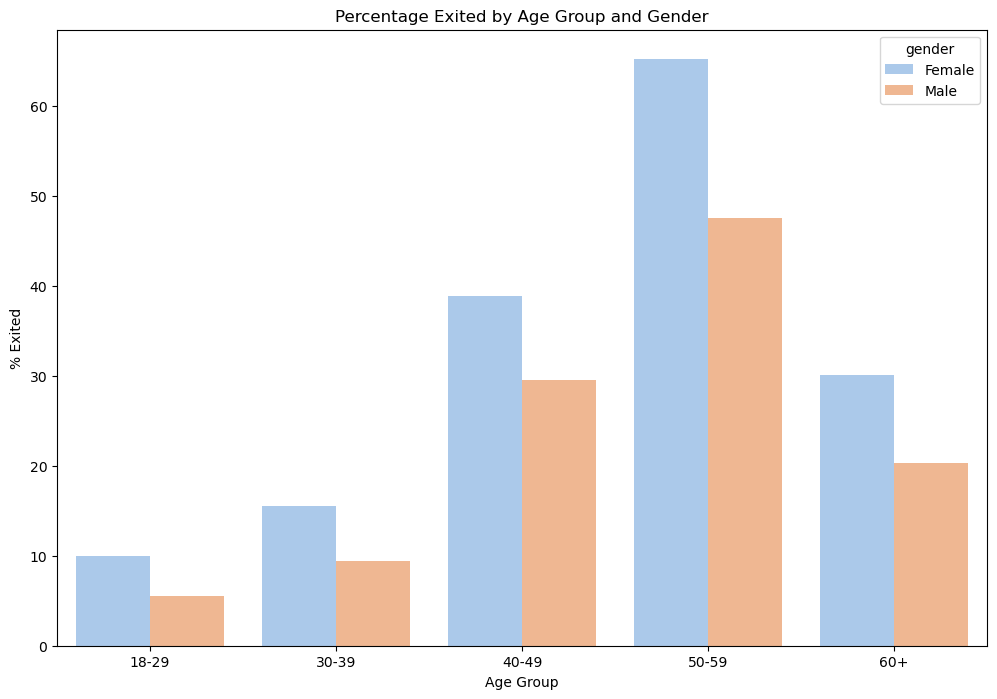

In [30]:
# Data
data = {
    'age_group': ['18-29', '18-29', '30-39', '30-39', '40-49', '40-49', '50-59', '50-59', '60+', '60+'],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    '% Exited': [9.931507, 5.514019, 15.569168, 9.390048, 38.909091, 29.508197, 65.217391, 47.536946, 30.046948, 20.318725]
}

# Create a DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='age_group', y='% Exited', hue='gender', data=df, palette='pastel')
plt.title('Percentage Exited by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('% Exited')
plt.show()

In [14]:
#% of customers leaving the bank by agr group and gender in descending order
df3.sort_values('% Exited', ascending = False)

% Exited
age_group Gender           
50-59     Female  65.217391
          Male    47.536946
40-49     Female  38.909091
60+       Female  30.046948
40-49     Male    29.508197
60+       Male    20.318725
30-39     Female  15.569168
18-29     Female   9.931507
30-39     Male     9.390048
18-29     Male     5.514019

In [15]:
#something that Kelly asked for
#df2.groupby(['Gender','NumOfProducts'])['Gender','NumOfProducts','LeftTheBank'].sum()

## % exiting by income bands

In [16]:
#now do bins and labels for incomes.
#use describe on income data to decide what ranges to use for bins
#df2['EstimatedSalary'].describe()

income_bins = range(0,225000, 25000);
#using list comprehension syntax to generate labels. NOTE use of income_bis[:-1] to produce 1 fewer label than income group
labels=[f"{i}-{i+24999}" for i in income_bins[:-1]] 

In [17]:
#print(labels)

In [18]:
df2['incomeGroups']= pd.cut(df2['EstimatedSalary'], bins=income_bins, labels=labels)

In [19]:
df2.groupby(['incomeGroups'])['Exited'].mean().to_frame()*100

,Exited
incomeGroups,
0-24999,19.884963
25000-49999,19.983819
50000-74999,20.961387
75000-99999,18.769716
100000-124999,20.062696
125000-149999,20.406568
150000-174999,21.255230
175000-199999,21.746032


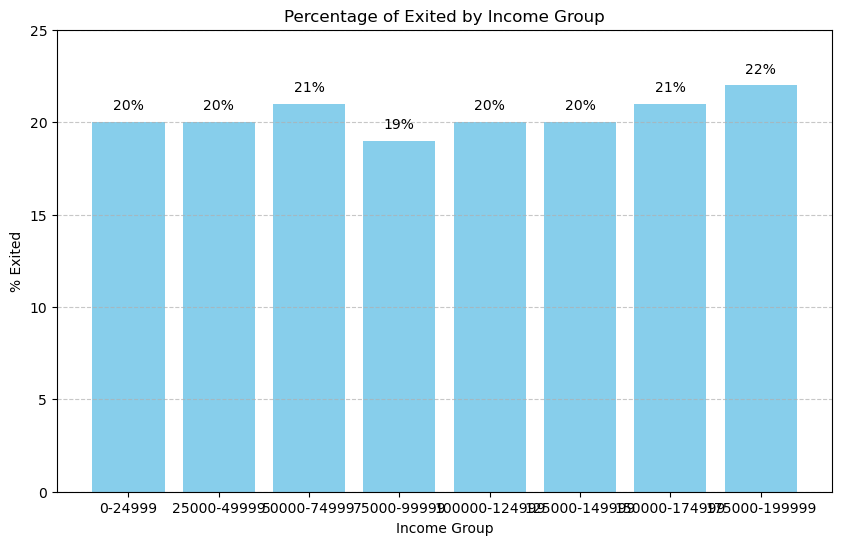

In [31]:
# Data
income_groups = ['0-24999', '25000-49999', '50000-74999', '75000-99999', '100000-124999', '125000-149999', '150000-174999', '175000-199999']
exit_percentages = [19.884963, 19.983819, 20.961387, 18.769716, 20.062696, 20.406568, 21.255230, 21.746032]

# Round exit percentages to integers
exit_percentages = [round(x) for x in exit_percentages]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(income_groups, exit_percentages, color='skyblue')
plt.title('Percentage of Exited by Income Group')
plt.xlabel('Income Group')
plt.ylabel('% Exited')
plt.ylim(0, 25)  # Adjust the y-axis limit if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the rounded values on top of the bars
for i, value in enumerate(exit_percentages):
    plt.text(i, value + 0.5, f'{value}%', ha='center', va='bottom')

plt.show()

 # exiting by income bands and gender

In [20]:
# % leavers by gender and income bands
df4 =df2.groupby(['Gender','incomeGroups'])['Exited'].mean().to_frame()*100
df4

Exited
Gender incomeGroups            
Female 0-24999        24.100719
       25000-49999    24.863884
       50000-74999    24.551971
       75000-99999    24.007220
       100000-124999  21.854305
       125000-149999  27.467105
       150000-174999  28.491620
       175000-199999  25.391304
Male   0-24999        16.338880
       25000-49999    16.058394
       50000-74999    18.143460
       75000-99999    14.705882
       100000-124999  18.452381
       125000-149999  14.008942
       150000-174999  15.349544
       175000-199999  18.686131

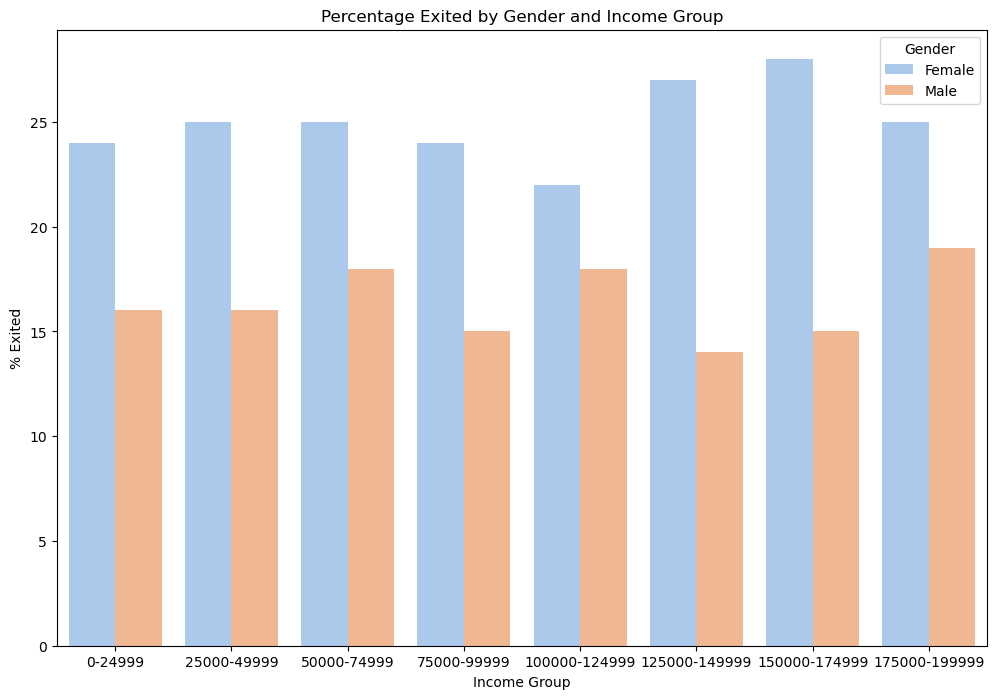

In [32]:
# Data
data = {
    'Gender': ['Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
               'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male'],
    'incomeGroups': ['0-24999', '25000-49999', '50000-74999', '75000-99999', '100000-124999', '125000-149999', '150000-174999', '175000-199999',
                     '0-24999', '25000-49999', '50000-74999', '75000-99999', '100000-124999', '125000-149999', '150000-174999', '175000-199999'],
    '% Exited': [24.100719, 24.863884, 24.551971, 24.007220, 21.854305, 27.467105, 28.491620, 25.391304,
                 16.338880, 16.058394, 18.143460, 14.705882, 18.452381, 14.008942, 15.349544, 18.686131]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Round percentages to integers
df['% Exited'] = df['% Exited'].round().astype(int)

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='incomeGroups', y='% Exited', hue='Gender', data=df, palette='pastel')
plt.title('Percentage Exited by Gender and Income Group')
plt.xlabel('Income Group')
plt.ylabel('% Exited')
plt.show()

## factors and their corollation with exiting the bank

In [21]:
corellation = df2.corr()[['Exited']];
corellation

C:\Users\Admin\AppData\Local\Temp\ipykernel_8364\320720164.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corellation = df2.corr()[['Exited']];


,Exited
CustomerId,-0.006203
CreditScore,-0.026771
Age,0.285296
YearsWithBank,-0.013656
Balance,0.118577
NumOfProducts,-0.047611
HasCrCard,-0.006976
IsActiveMember,-0.156356
EstimatedSalary,0.012490
Exited,1.000000


In [22]:
# feature importance with respect to customers leaving
from sklearn.ensemble import RandomForestClassifier;
from sklearn.preprocessing import LabelEncoder;

x = df2.drop(['Gender','Exited', 'Card Type','age_group','incomeGroups'], axis=1);#remove non-numeric columns
y = df2['Exited'];

label_encoder = LabelEncoder();
X_encoded = x.copy();

for col in X_encoded:
    if X_encoded[col].dtype == 'Object':
        X_encoded[col] = label_encoder.fit_transform(X_encoded[col]);

rf = RandomForestClassifier();
rf.fit(X_encoded, y);

feature_importances = pd.Series(rf.feature_importances_,index=X_encoded.columns);
print(feature_importances.sort_values(ascending =False))

Complain              0.839986
Age                   0.063761
NumOfProducts         0.044526
IsActiveMember        0.011839
Balance               0.011005
CreditScore           0.007387
EstimatedSalary       0.005791
Point Earned          0.005380
CustomerId            0.005168
YearsWithBank         0.002821
Satisfaction Score    0.001614
HasCrCard             0.000723
dtype: float64


In [23]:
#number of products to churn rate
#get % of customers wrt no of products
percentByProductNo =df2.groupby('NumOfProducts')['CustomerId'].agg(['count', lambda x: x.count()/len(df2)*100]);
percentByProductNo = percentByProductNo.rename(columns={'count':'No of customers','<lambda_0>':'% of customers'});
percentByProductNo

,No of customers,% of customers
NumOfProducts,,
1,5084,50.84
2,4590,45.90
3,266,2.66
4,60,0.60


In [24]:
# % of customer who left grouped by number of products held
df2.groupby('NumOfProducts')['Exited'].mean().to_frame()*100

,Exited
NumOfProducts,
1,27.714398
2,7.603486
3,82.706767
4,100.000000


In [25]:
#leavers by age and years with the bank and incomes?
# bins = [18,30,40,50,60,100];
# labels = ['18-29','30-39', '40-49', '50-59', '60+'];
# df2['age_group']= pd.cut(df2['Age'], bins=bins, labels=labels);

#get details of numbers of years with bankg 
df2['YearsWithBank'].describe() # chose 1-year intervals to break years down by
df2.groupby('YearsWithBank')['Exited'].count()# not useful as this counts both 0 and 1 entries;
df2.groupby('YearsWithBank')['Exited'].sum()#more useful as this tells us the number who left (the 1s in exit column)


YearsWithBank
0      95
1     232
2     201
3     213
4     203
5     209
6     196
7     177
8     197
9     214
10    101
Name: Exited, dtype: int64

In [26]:
# number and % leaving the bank grouped by gender and years with the bank
leaversByYearWithBank =df2.groupby(['YearsWithBank', 'Gender'])['Exited'].agg(['count','sum', lambda x: x.sum()/len(x)*100]);
leaversByYearWithBank.rename(columns={'count':'No of customers','sum':'No of customers leaving','<lambda_0>':'% of customers leaving'}, inplace=True)
leaversByYearWithBank

No of customers  No of customers leaving  \
YearsWithBank Gender                                             
0             Female              204                       55   
              Male                209                       40   
1             Female              478                      130   
              Male                557                      102   
2             Female              480                      113   
              Male                568                       88   
3             Female              469                      119   
              Male                540                       94   
4             Female              442                      107   
              Male                547                       96   
5             Female              448                      124   
              Male                564                       85   
6             Female              458                      106   
              Male                509                       90   
7             Female              464                      100   
              Male                564                       77   
8             Female              433                      109   
              Male                592                       88   
9             Female              422                      110   
              Male                562                      104   
10            Female              245                       66   
              Male                245                       35   

                      % of customers leaving  
YearsWithBank Gender                          
0             Female               26.960784  
              Male                 19.138756  
1             Female               27.196653  
              Male                 18.312388  
2             Female               23.541667  
              Male                 15.492958  
3             Female               25.373134  
              Male                 17.407407  
4             Female               24.208145  
              Male                 17.550274  
5             Female               27.678571  
              Male                 15.070922  
6             Female               23.144105  
              Male                 17.681729  
7             Female               21.551724  
              Male                 13.652482  
8             Female               25.173210  
              Male                 14.864865  
9             Female               26.066351  
              Male                 18.505338  
10            Female               26.938776  
              Male                 14.285714